In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

In [2]:
ds = pd.read_csv('data/swissbanknotes.txt', delimiter=' ', index_col='key')

In [3]:
ds

,Length,Left,Right,Bottom,Top,Diagonal
key,,,,,,
BN1,214.8,131.0,131.1,9.0,9.7,141.0
BN2,214.6,129.7,129.7,8.1,9.5,141.7
BN3,214.8,129.7,129.7,8.7,9.6,142.2
BN4,214.8,129.7,129.6,7.5,10.4,142.0
BN5,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
BN196,215.0,130.4,130.3,9.9,12.1,139.6
BN197,215.1,130.3,129.9,10.3,11.5,139.7
BN198,214.8,130.3,130.4,10.6,11.1,140.0


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning

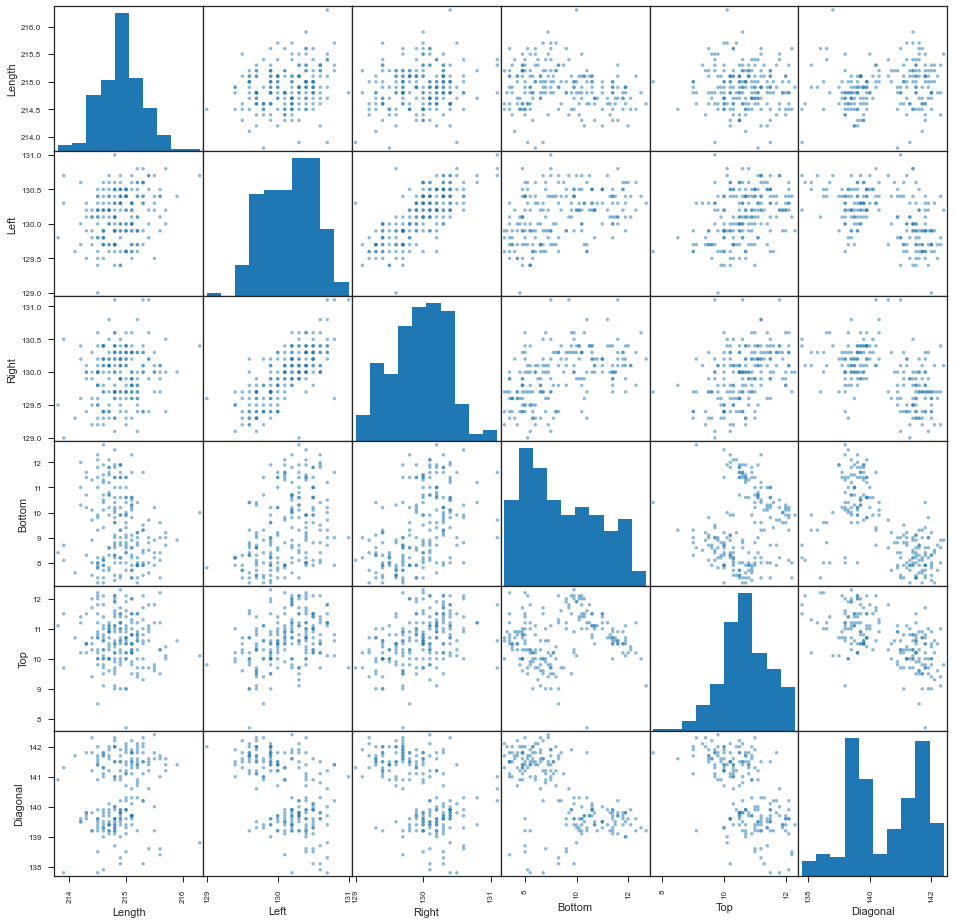

In [4]:
pd.plotting.scatter_matrix(ds, figsize=(16,16))
plt.show()

In [5]:
X = np.c_[tuple(ds[col] for col in ds.columns)]

In [6]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, 3, 
                                    tol=1.0e-6, n_iter=500, n_step=22, h=0.1)

In [7]:
km.fit(X)

1


In [8]:
for S in km.scatters:
    print(np.linalg.eigvals(np.asarray(S)))

[3.3179602  2.66051671 0.22312979 0.60359654 0.88448531 0.9509724 ]
[3.37474837 2.20949081 1.32168407 0.23619148 0.80944756 0.53074486]
[9.34327989 1.91849625 1.18466012 0.14894821 0.51839505 0.60988756]


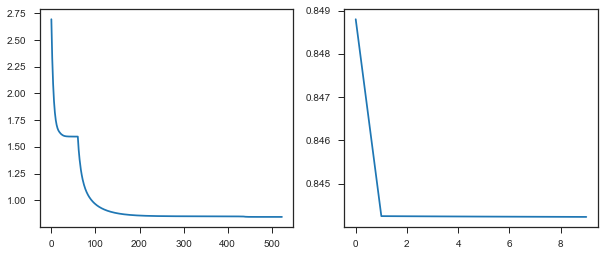

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

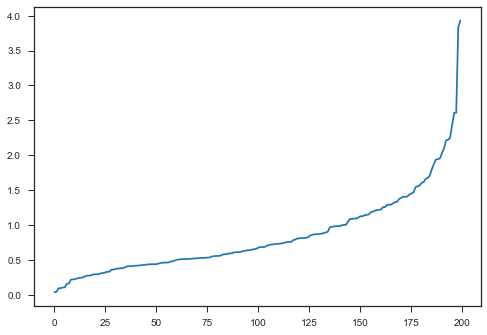

In [10]:
D = np.asarray(km.calc_distances())
D.sort()
plt.plot(D)
plt.show()

In [11]:
avrfunc = averager_it(func.QuantileFunc(0.90, func.Sqrt(0.001)))
avrfunc = avragg.WMAverage(avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, 3, 
                                    tol=1.0e-6, n_iter=1000, n_step=50, h=0.9)

In [12]:
hcd.fit(X)

1


In [13]:
for S in hcd.scatters:
    print(np.linalg.eigvals(np.asarray(S)))
# for S in hcd.scatters:
#     print(np.asarray(S))

[4.40503412 2.61899498 1.20404759 0.63965049 0.43432642 0.25912745]
[4.06645281 2.37659995 1.52188014 0.16199576 0.75614425 0.55505934]
[6.07362063 1.92982111 1.04726903 0.58077082 0.50677679 0.27679327]


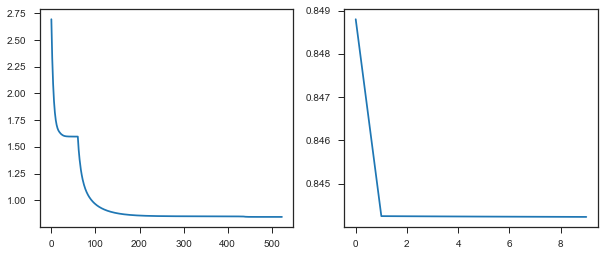

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

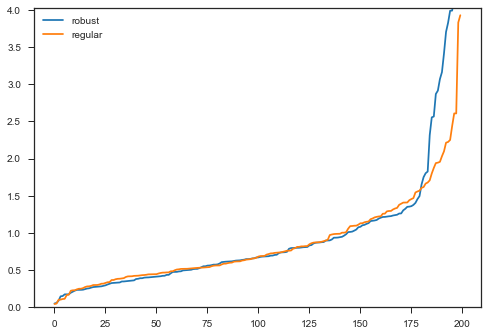

In [15]:
D2 = np.asarray(hcd.calc_distances())
D2.sort()
plt.plot(D2, label='robust')
plt.plot(D, label='regular')
plt.ylim(0,max(D)+0.1)
plt.legend()
plt.show()